<a href="https://www.kaggle.com/code/bhanupratapbiswas/world-top-billionaires-list-analysis?scriptVersionId=134880713" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-top-billionaires/billionaires.csv


In [2]:
df = pd.read_csv('/kaggle/input/world-top-billionaires/billionaires.csv')
df.head(5)

,Name,Rank,Year,Company Founded,Company Name,Company Relationship,Company Sector,Company Type,Demographics Age,Demographics Gender,...,Location GDP,Location Region,Wealth Type,Wealth Worth In Billions,Wealth How Category,Wealth How From Emerging,Wealth How Industry,Wealth How Inherited,Wealth How Was Founder,Wealth How Was Political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True


# Data Exploration

In [3]:
df.isna().sum()

Name                         0
Rank                         0
Year                         0
Company Founded              0
Company Name                38
Company Relationship        46
Company Sector              23
Company Type                36
Demographics Age             0
Demographics Gender         33
Location Citizenship         0
Location Country Code        0
Location GDP                 0
Location Region              0
Wealth Type                 22
Wealth Worth In Billions     0
Wealth How Category          1
Wealth How From Emerging     0
Wealth How Industry          1
Wealth How Inherited         0
Wealth How Was Founder       0
Wealth How Was Political     0
dtype: int64

In [4]:
df['Demographics Gender'].fillna(df['Demographics Gender'].mode()[0], inplace=True)
df['Wealth Type'].fillna(df['Wealth Type'].mode()[0], inplace=True)
df['Wealth How Category'].fillna(df['Wealth How Category'].mode()[0], inplace=True)
df['Wealth How Industry'].fillna(df['Wealth How Industry'].mode()[0], inplace=True)
df['Company Name'].fillna(df['Company Name'].mode()[0], inplace=True)
df['Company Relationship'].fillna(df['Company Relationship'].mode()[0], inplace=True)
df['Company Sector'].fillna(df['Company Sector'].mode()[0], inplace=True)
df['Company Type'].fillna(df['Company Type'].mode()[0], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2614 non-null   object 
 1   Rank                      2614 non-null   int64  
 2   Year                      2614 non-null   int64  
 3   Company Founded           2614 non-null   int64  
 4   Company Name              2614 non-null   object 
 5   Company Relationship      2614 non-null   object 
 6   Company Sector            2614 non-null   object 
 7   Company Type              2614 non-null   object 
 8   Demographics Age          2614 non-null   int64  
 9   Demographics Gender       2614 non-null   object 
 10  Location Citizenship      2614 non-null   object 
 11  Location Country Code     2614 non-null   object 
 12  Location GDP              2614 non-null   float64
 13  Location Region           2614 non-null   object 
 14  Wealth T

In [6]:
df[df['Demographics Gender'] == 'male']

,Name,Rank,Year,Company Founded,Company Name,Company Relationship,Company Sector,Company Type,Demographics Age,Demographics Gender,...,Location GDP,Location Region,Wealth Type,Wealth Worth In Billions,Wealth How Category,Wealth How From Emerging,Wealth How Industry,Wealth How Inherited,Wealth How Was Founder,Wealth How Was Political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,Wu Chung-Yi,1565,2014,1991,Tingyi,investor,beverages and food,new,55,male,...,0.000000e+00,East Asia,executive,1.0,Traded Sectors,True,Non-consumer industrial,not inherited,True,True
2610,Wu Xiong,1565,2014,1999,Biostime International Holdings,owner,infant formula,new,0,male,...,0.000000e+00,East Asia,executive,1.0,Traded Sectors,True,Consumer,not inherited,True,True
2611,Yang Keng,1565,2014,0,Blue Ray Corp,chairman,real estate,new,53,male,...,0.000000e+00,East Asia,self-made finance,1.0,Financial,True,Real Estate,not inherited,True,True
2612,Zdenek Bakala,1565,2014,1994,Patria Finance,founder,coal,new,53,male,...,0.000000e+00,Europe,privatized and resources,1.0,Resource Related,True,Mining and metals,not inherited,True,True


In [7]:
df['Demographics Gender'].unique()

array(['male', 'female', 'married couple'], dtype=object)

In [8]:
df['Company Relationship'].unique()

array(['founder', 'founder/chairman', 'Relation', 'relation', 'CEO',
       'chairman', 'investor', 'founder and CEO', 'founder/CEO', 'owner',
       'chairman of management committee', 'founder and chairman',
       'Chairman and Chief Executive Officer', 'general director',
       'executive chairman', 'Chairman/founder', 'founder, chairman, ceo',
       'former chairman and CEO', 'relation and chairman',
       'investor/founder', 'partner', 'president', 'investor and  CEO',
       'founder CEO owner', 'Chairman/shareholder', 'Vice President',
       'chairman of the board', 'founder/relation', 'ceo', 'investor ',
       'founder/vice chairman', 'Chairman', 'Honorary President for Life',
       'former CEO', 'inherited', 'vice-chairman', 'owner and vice chair',
       'founder/president', 'co-chairman', 'lawer',
       'relation/vice chairman', 'Chairman, CEO', 'employee',
       "head of Microsoft's application software group", 'chariman',
       'Exectuitve Director', 'vice chairm

In [9]:
df[df['Company Relationship'] == 'owner']

,Name,Rank,Year,Company Founded,Company Name,Company Relationship,Company Sector,Company Type,Demographics Age,Demographics Gender,...,Location GDP,Location Region,Wealth Type,Wealth Worth In Billions,Wealth How Category,Wealth How From Emerging,Wealth How Industry,Wealth How Inherited,Wealth How Was Founder,Wealth How Was Political
158,Vladimir Lisin,53,2014,1992,NLMK,owner,steel,aquired,57,male,...,0.000000e+00,Europe,privatized and resources,16.6,Resource Related,True,Non-consumer industrial,not inherited,True,True
206,Donald Bren,69,2014,1864,Irvine Company,owner,real estate,aquired,81,male,...,0.000000e+00,North America,self-made finance,14.4,Financial,True,Real Estate,not inherited,True,True
295,Donald Bren,98,2001,1864,Irvine Company,owner,real estate,aquired,68,male,...,1.060000e+13,North America,self-made finance,4.0,Financial,True,Real Estate,not inherited,True,True
332,Mikhail Prokhorov,109,2014,1993,Norilsk Nickel,owner,precious metals,privatization,48,male,...,0.000000e+00,Europe,privatized and resources,10.9,Financial,True,Diversified financial,not inherited,True,True
420,Philippe Foriel-Destezet,138,2001,1996,Adecco,owner,HR consulting,aquired,65,male,...,1.380000e+12,Europe,executive,3.2,Non-Traded Sectors,True,"Retail, Restaurant",not inherited,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2532,Zadik Bino,1540,2014,1922,Paz oil company,owner,oil,new,70,male,...,0.000000e+00,Middle East/North Africa,self-made finance,1.1,Financial,True,Money Management,not inherited,True,True
2533,Alberto Alcocer,1565,2014,1952,Construcciones y Contratas,owner,construction,aquired,71,male,...,0.000000e+00,Europe,self-made finance,1.0,Financial,True,Diversified financial,not inherited,True,True
2542,Boris Mints,1565,2014,2010,O1 Properties,owner,real estate,new,55,male,...,0.000000e+00,Europe,self-made finance,1.0,Financial,True,Real Estate,not inherited,True,True
2577,Lin Ming-Hsiung,1565,2014,1998,Pxmart,owner,retail,privatization,64,male,...,0.000000e+00,East Asia,privatized and resources,1.0,Non-Traded Sectors,True,"Retail, Restaurant",not inherited,True,True


In [10]:
df[(df['Company Relationship'] == 'owner') & (df['Demographics Age'] > 40)]

,Name,Rank,Year,Company Founded,Company Name,Company Relationship,Company Sector,Company Type,Demographics Age,Demographics Gender,...,Location GDP,Location Region,Wealth Type,Wealth Worth In Billions,Wealth How Category,Wealth How From Emerging,Wealth How Industry,Wealth How Inherited,Wealth How Was Founder,Wealth How Was Political
158,Vladimir Lisin,53,2014,1992,NLMK,owner,steel,aquired,57,male,...,0.000000e+00,Europe,privatized and resources,16.6,Resource Related,True,Non-consumer industrial,not inherited,True,True
206,Donald Bren,69,2014,1864,Irvine Company,owner,real estate,aquired,81,male,...,0.000000e+00,North America,self-made finance,14.4,Financial,True,Real Estate,not inherited,True,True
295,Donald Bren,98,2001,1864,Irvine Company,owner,real estate,aquired,68,male,...,1.060000e+13,North America,self-made finance,4.0,Financial,True,Real Estate,not inherited,True,True
332,Mikhail Prokhorov,109,2014,1993,Norilsk Nickel,owner,precious metals,privatization,48,male,...,0.000000e+00,Europe,privatized and resources,10.9,Financial,True,Diversified financial,not inherited,True,True
420,Philippe Foriel-Destezet,138,2001,1996,Adecco,owner,HR consulting,aquired,65,male,...,1.380000e+12,Europe,executive,3.2,Non-Traded Sectors,True,"Retail, Restaurant",not inherited,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,Wang Laisheng,1540,2014,2004,Luxshare Precision Industry,owner,electonics components,new,49,male,...,0.000000e+00,East Asia,executive,1.1,New Sectors,True,Technology-Computer,not inherited,True,True
2532,Zadik Bino,1540,2014,1922,Paz oil company,owner,oil,new,70,male,...,0.000000e+00,Middle East/North Africa,self-made finance,1.1,Financial,True,Money Management,not inherited,True,True
2533,Alberto Alcocer,1565,2014,1952,Construcciones y Contratas,owner,construction,aquired,71,male,...,0.000000e+00,Europe,self-made finance,1.0,Financial,True,Diversified financial,not inherited,True,True
2542,Boris Mints,1565,2014,2010,O1 Properties,owner,real estate,new,55,male,...,0.000000e+00,Europe,self-made finance,1.0,Financial,True,Real Estate,not inherited,True,True


In [11]:
df[df['Rank'] < 11]

,Name,Rank,Year,Company Founded,Company Name,Company Relationship,Company Sector,Company Type,Demographics Age,Demographics Gender,...,Location GDP,Location Region,Wealth Type,Wealth Worth In Billions,Wealth How Category,Wealth How From Emerging,Wealth How Industry,Wealth How Inherited,Wealth How Was Founder,Wealth How Was Political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True
5,Carlos Slim Helu,2,2014,1990,Telmex,founder,Communications,privatization,74,male,...,0.000000e+00,Latin America,privatized and resources,72.0,Non-Traded Sectors,True,Media,not inherited,True,True
6,Oeri Hoffman and Sacher,3,1996,1896,F. Hoffmann-La Roche,founder,pharmaceuticals,new,0,male,...,3.300000e+11,Europe,inherited,13.1,New Sectors,True,Technology-Medical,3rd generation,True,True
7,Paul Allen,3,2001,1975,Microsoft,founder,technology,new,48,male,...,1.060000e+13,North America,founder non-finance,30.4,New Sectors,True,Technology-Computer,not inherited,True,True
8,Amancio Ortega,3,2014,1975,Zara,founder,Fashion,new,77,male,...,0.000000e+00,Europe,founder non-finance,64.0,Non-Traded Sectors,True,"Retail, Restaurant",not inherited,True,True
9,Lee Shau Kee,4,1996,1976,Henderson Land Development,founder/chairman,real estate,new,68,male,...,1.600000e+11,East Asia,self-made finance,12.7,Financial,True,Real Estate,not inherited,True,True


In [12]:
df.columns

Index(['Name', 'Rank', 'Year', 'Company Founded', 'Company Name',
       'Company Relationship', 'Company Sector', 'Company Type',
       'Demographics Age', 'Demographics Gender', 'Location Citizenship',
       'Location Country Code', 'Location GDP', 'Location Region',
       'Wealth Type', 'Wealth Worth In Billions', 'Wealth How Category',
       'Wealth How From Emerging', 'Wealth How Industry',
       'Wealth How Inherited', 'Wealth How Was Founder',
       'Wealth How Was Political'],
      dtype='object')

In [13]:
!pip install matplotlib seaborn plotly

# Data Visualization

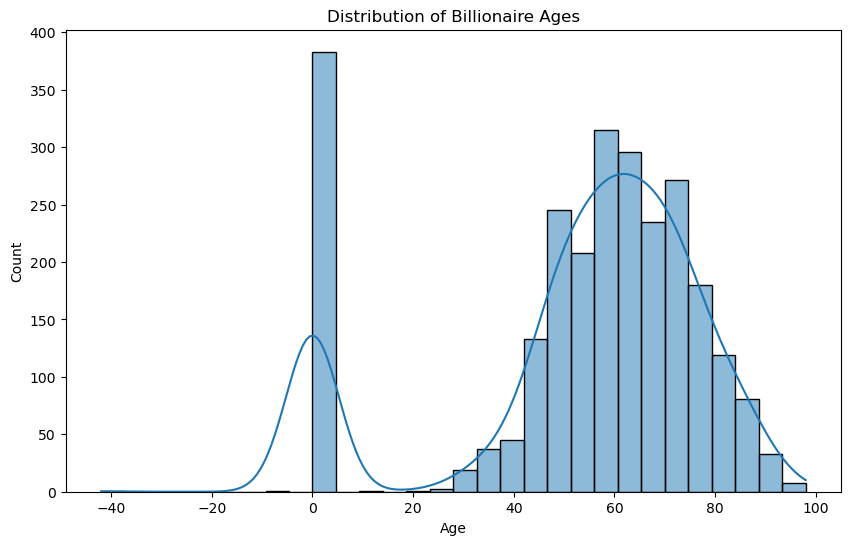

In [14]:
# Distribution of billionaire ages
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Demographics Age', bins=30, kde=True)
plt.title('Distribution of Billionaire Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [15]:
# Scatter plot showing the relationship between wealth worth and age
fig = px.scatter(df, x='Demographics Age', y='Wealth Worth In Billions',
                 color='Company Sector', hover_name='Name',
                 title='Wealth Worth vs. Age of Billionaires')
fig.show()


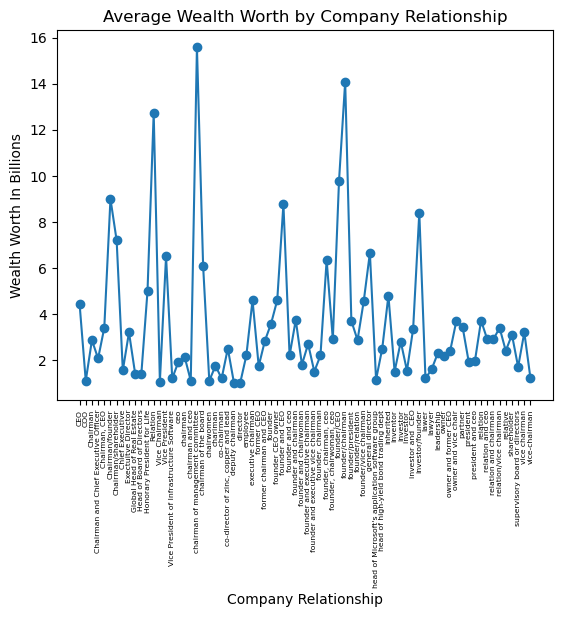

In [16]:
# Filter the DataFrame to include only the required columns
df_filtered = df[['Company Relationship', 'Wealth Worth In Billions']]

# Group the data by 'Company Relationship' and calculate the average wealth worth
df_grouped = df_filtered.groupby('Company Relationship').mean()

# Create the line plot
plt.plot(df_grouped.index, df_grouped['Wealth Worth In Billions'], marker='o')

# Set the plot title and labels
plt.title('Average Wealth Worth by Company Relationship')
plt.xlabel('Company Relationship')
plt.ylabel('Wealth Worth In Billions')

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90, fontsize=5.5)

# Display the plot
plt.show()


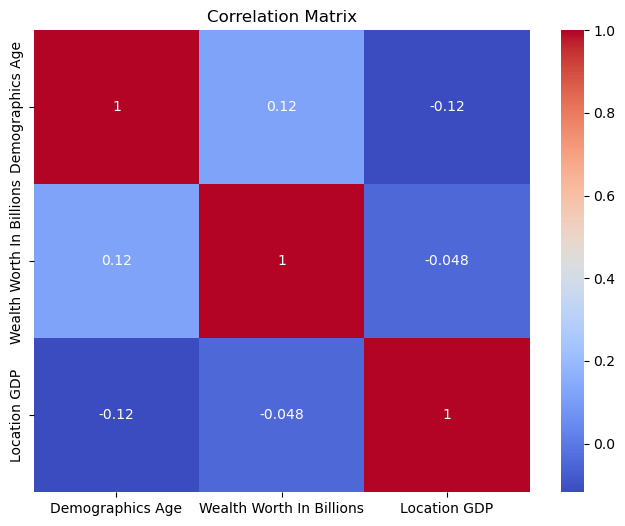

In [17]:
# Calculate the correlation matrix
corr_matrix = df[['Demographics Age', 'Wealth Worth In Billions', 'Location GDP']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


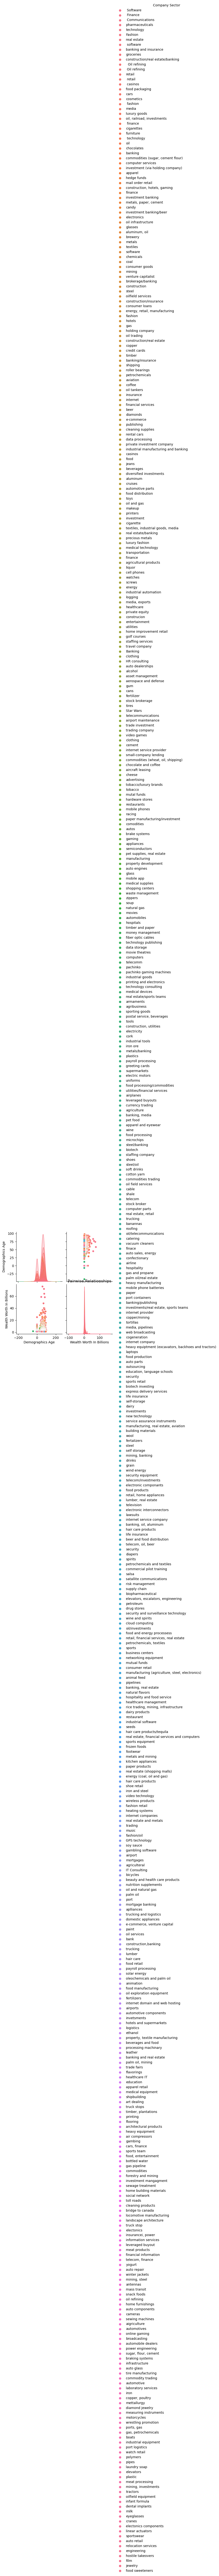

In [18]:
# Select a subset of columns for the pair plot
subset_columns = ['Demographics Age', 'Wealth Worth In Billions', 'Company Sector']

# Create a pair plot
sns.pairplot(data=df[subset_columns], hue='Company Sector')
plt.title('Pairwise Relationships')
plt.show()


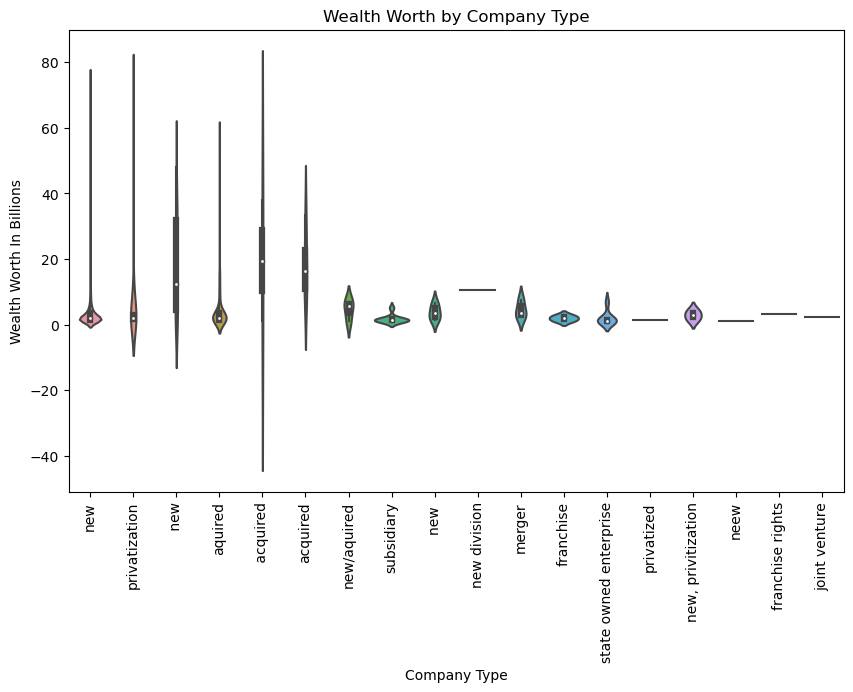

In [19]:
# Violin plot showing the wealth worth by company type
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Company Type', y='Wealth Worth In Billions')
plt.xticks(rotation=90)
plt.title('Wealth Worth by Company Type')
plt.show()



# Submission

In [20]:
df.to_csv('World_Top_Billionaires_List_Analysis.csv', index=True)

# Thank You